In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("archivo 1.csv")

In [104]:
df.head()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [106]:
df = df[df["parentesco_jefe_hogar"]=="jefe_hogar"].reset_index(drop=True)

In [107]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,1050000.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,5000000.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0


In [108]:
lista_utiles=["edad","estado_civil","viaje_noche_fuera","motivo_viaje","compañía_viaje","destino_depto","destino_municipio","monto_ultimo_viaje","gastos_alojamiento_valor","gastos_transporte_valor","gastos_trans_publico_lugar_valor","gastos_bienes_personales_valor","gastos_regalos_valor","gastos_otros_valor","gastos_transporte_aereo_valor","estrato","num_noches","ingreso_mensual_aprox_sin_fuentes","ingreso_mensual_aprox"]

In [109]:
lista_utiles

['edad',
 'estado_civil',
 'viaje_noche_fuera',
 'motivo_viaje',
 'compañía_viaje',
 'destino_depto',
 'destino_municipio',
 'monto_ultimo_viaje',
 'gastos_alojamiento_valor',
 'gastos_transporte_valor',
 'gastos_trans_publico_lugar_valor',
 'gastos_bienes_personales_valor',
 'gastos_regalos_valor',
 'gastos_otros_valor',
 'gastos_transporte_aereo_valor',
 'estrato',
 'num_noches',
 'ingreso_mensual_aprox_sin_fuentes',
 'ingreso_mensual_aprox']

In [110]:
df=df[lista_utiles]

In [111]:
df

,edad,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,56,soltero,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,880000.0
1,39,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,860000.0
2,68,viudo,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1050000.0
3,34,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,820000.0
4,25,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,63,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,9000000.0
14025,66,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,828116.0
14026,71,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5000000.0
14027,50,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3800000.0


In [112]:
gastos=["gastos_alojamiento_valor","gastos_transporte_valor","gastos_trans_publico_lugar_valor","gastos_bienes_personales_valor","gastos_regalos_valor","gastos_otros_valor","gastos_transporte_aereo_valor"]

In [113]:
df["gastos_totales"]= df.fillna(0)[gastos].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df

,edad,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
0,56,soltero,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,880000.0,0.0
1,39,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,860000.0,0.0
2,68,viudo,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1050000.0,0.0
3,34,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,820000.0,0.0
4,25,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,63,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,9000000.0,0.0
14025,66,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,828116.0,0.0
14026,71,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5000000.0,0.0
14027,50,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3800000.0,0.0


In [115]:
df.tail()

,edad,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
14024,63,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,9000000.0,0.0
14025,66,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,828116.0,0.0
14026,71,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5000000.0,0.0
14027,50,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3800000.0,0.0
14028,61,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,150000.0,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,4000000.0,150000.0


In [116]:
df.head()

,edad,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
0,56,soltero,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,880000.0,0.0
1,39,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,860000.0,0.0
2,68,viudo,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1050000.0,0.0
3,34,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,820000.0,0.0
4,25,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,850000.0,0.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               14029 non-null  int64  
 1   estado_civil                       14029 non-null  object 
 2   viaje_noche_fuera                  14029 non-null  object 
 3   motivo_viaje                       1618 non-null   object 
 4   compañía_viaje                     1618 non-null   object 
 5   destino_depto                      1618 non-null   object 
 6   destino_municipio                  1618 non-null   object 
 7   monto_ultimo_viaje                 1618 non-null   float64
 8   gastos_alojamiento_valor           360 non-null    float64
 9   gastos_transporte_valor            1231 non-null   float64
 10  gastos_trans_publico_lugar_valor   439 non-null    float64
 11  gastos_bienes_personales_valor     264 non-null    flo

In [118]:
df.describe()

,edad,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
count,14029.000000,1.618000e+03,3.600000e+02,1.231000e+03,439.000000,2.640000e+02,2.630000e+02,3.890000e+02,1.570000e+02,14017.000000,2.360000e+02,1.379300e+04,1.402900e+04
mean,50.038278,5.962915e+05,3.237938e+05,1.168650e+05,65759.412301,1.353931e+05,1.461878e+05,1.427845e+05,4.645215e+05,2.261540,9.487635e+05,1.604475e+06,3.506730e+04
std,16.335275,1.032644e+06,5.682872e+05,1.437931e+05,87044.725580,2.156579e+05,1.883994e+05,2.082027e+05,5.724374e+05,1.109295,6.282410e+05,1.651129e+06,2.208980e+05
min,15.000000,0.000000e+00,9.800000e+01,9.800000e+01,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000,9.800000e+01,9.800000e+01,0.000000e+00
25%,37.000000,1.100000e+05,6.000000e+04,4.000000e+04,20000.000000,3.000000e+04,5.000000e+04,4.000000e+04,2.000000e+05,1.000000,6.000000e+05,8.000000e+05,0.000000e+00
50%,50.000000,3.000000e+05,1.500000e+05,7.800000e+04,40000.000000,6.000000e+04,1.000000e+05,9.000000e+04,3.000000e+05,2.000000,8.270000e+05,1.128000e+06,0.000000e+00
75%,62.000000,6.000000e+05,3.000000e+05,1.500000e+05,80000.000000,1.500000e+05,2.000000e+05,1.700000e+05,5.100000e+05,3.000000,1.000000e+06,2.000000e+06,0.000000e+00
max,102.000000,1.436000e+07,5.000000e+06,2.000000e+06,800000.000000,1.600000e+06,1.500000e+06,1.900000e+06,4.000000e+06,9.000000,4.600000e+06,3.000000e+07,8.000000e+06


In [119]:
df.duplicated().sum()

2658

In [120]:
df.drop_duplicates()

,edad,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,monto_ultimo_viaje,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
0,56,soltero,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,880000.0,0.0
1,39,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,860000.0,0.0
2,68,viudo,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1050000.0,0.0
3,34,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,820000.0,0.0
4,25,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,63,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,9000000.0,0.0
14025,66,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,828116.0,0.0
14026,71,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5000000.0,0.0
14027,50,casado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3800000.0,0.0


In [121]:
dict.fromkeys(df)

{'edad': None,
 'estado_civil': None,
 'viaje_noche_fuera': None,
 'motivo_viaje': None,
 'compañía_viaje': None,
 'destino_depto': None,
 'destino_municipio': None,
 'monto_ultimo_viaje': None,
 'gastos_alojamiento_valor': None,
 'gastos_transporte_valor': None,
 'gastos_trans_publico_lugar_valor': None,
 'gastos_bienes_personales_valor': None,
 'gastos_regalos_valor': None,
 'gastos_otros_valor': None,
 'gastos_transporte_aereo_valor': None,
 'estrato': None,
 'num_noches': None,
 'ingreso_mensual_aprox_sin_fuentes': None,
 'ingreso_mensual_aprox': None,
 'gastos_totales': None}

In [122]:
df.duplicated().sum()

2658

In [123]:
df.isna().sum()

edad                                     0
estado_civil                             0
viaje_noche_fuera                        0
motivo_viaje                         12411
compañía_viaje                       12411
destino_depto                        12411
destino_municipio                    12411
monto_ultimo_viaje                   12411
gastos_alojamiento_valor             13669
gastos_transporte_valor              12798
gastos_trans_publico_lugar_valor     13590
gastos_bienes_personales_valor       13765
gastos_regalos_valor                 13766
gastos_otros_valor                   13640
gastos_transporte_aereo_valor        13872
estrato                                 12
num_noches                           12411
ingreso_mensual_aprox_sin_fuentes    13793
ingreso_mensual_aprox                  236
gastos_totales                           0
dtype: int64

In [124]:
lista_relevantes=["edad","viaje_noche_fuera","estrato","ingreso_mensual_aprox","gastos_totales"]

In [125]:
df = df[lista_relevantes]

In [126]:
df

,edad,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,no,1.0,880000.0,0.0
1,39,no,1.0,860000.0,0.0
2,68,no,1.0,1050000.0,0.0
3,34,no,1.0,820000.0,0.0
4,25,no,1.0,850000.0,0.0
...,...,...,...,...,...
14024,63,no,2.0,9000000.0,0.0
14025,66,no,1.0,828116.0,0.0
14026,71,no,4.0,5000000.0,0.0
14027,50,no,3.0,3800000.0,0.0


In [127]:
df=df.replace({"viaje_noche_fuera":{"si":1,"no":0}})

In [128]:
df=df.replace({"estado_civil":{"casado":1,"separado_divorciado":2,"pareja_union_libre":3,"soltero":4,"viudo":5,"pareja_no_union_libre":6}})

In [129]:
df

,edad,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,0,1.0,880000.0,0.0
1,39,0,1.0,860000.0,0.0
2,68,0,1.0,1050000.0,0.0
3,34,0,1.0,820000.0,0.0
4,25,0,1.0,850000.0,0.0
...,...,...,...,...,...
14024,63,0,2.0,9000000.0,0.0
14025,66,0,1.0,828116.0,0.0
14026,71,0,4.0,5000000.0,0.0
14027,50,0,3.0,3800000.0,0.0


##Segundo punto


(array([12361.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1668.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

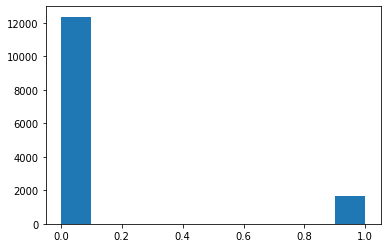

In [130]:
plt.hist(df["viaje_noche_fuera"])

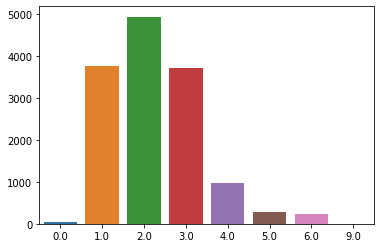

In [131]:
gender=df["estrato"].value_counts()
sns.barplot(x=gender.index, y=gender.values)
plt.show()

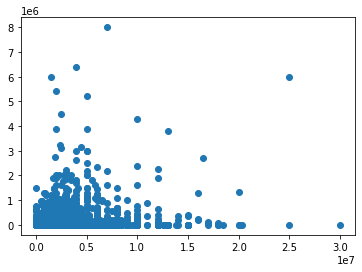

In [132]:
plt.scatter(df["ingreso_mensual_aprox"], df["gastos_totales"])

In [150]:
df=df.dropna()

In [151]:
df

,edad,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,0,1.0,880000.0,0.0
1,39,0,1.0,860000.0,0.0
2,68,0,1.0,1050000.0,0.0
3,34,0,1.0,820000.0,0.0
4,25,0,1.0,850000.0,0.0
...,...,...,...,...,...
14024,63,0,2.0,9000000.0,0.0
14025,66,0,1.0,828116.0,0.0
14026,71,0,4.0,5000000.0,0.0
14027,50,0,3.0,3800000.0,0.0


In [152]:
y = df["viaje_noche_fuera"]
x = df[["edad","gastos_totales","ingreso_mensual_aprox","estrato"]]
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg = model.fit()
reg.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     902.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:47:33   Log-Likelihood:                -2414.5
No. Observations:               13781   AIC:                             4839.
Df Residuals:                   13776   BIC:                             4877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0985      0.009     11.123      0.000       0.081       0.116
edad                     -0.0017      0.000    -10.881      0.000      -0.002      -0.001
gastos_totales         5.937e-07   1.13e-08     52.521      0.000    5.72e-07    6.16e-07
ingreso_mensual_aprox  9.978e-09   1.69e-09      5.899      0.000    6.66e-09    1.33e-08
estrato                   0.0294      0.003     11.747      0.000       0.024       0.034
==============================================================================
Omnibus:                     5609.756   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55479.611
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##3 punto


##se evidencia dentro de las 4 primeras graficas cmo se comportar las variables dependientes frente a las independientes y asu vez concluimos con la probabilidad de si viaja o no.


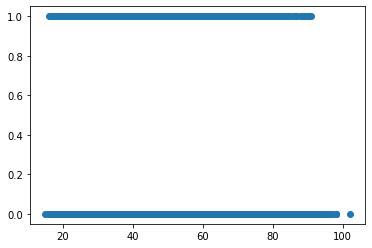

In [156]:
plt.scatter(df["edad"], df["viaje_noche_fuera"])



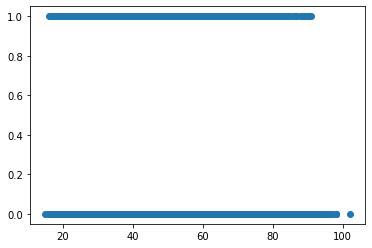

In [157]:
plt.scatter(df["edad"], df["viaje_noche_fuera"])

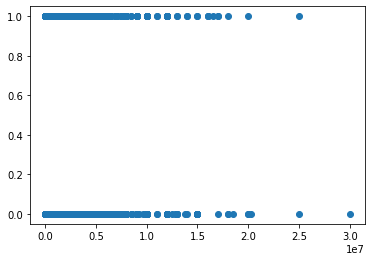

In [158]:
plt.scatter(df["ingreso_mensual_aprox"], df["viaje_noche_fuera"])

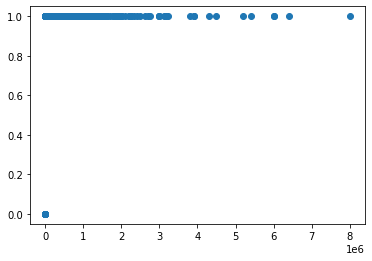

In [159]:
plt.scatter(df["gastos_totales"], df["viaje_noche_fuera"])

(array([12140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

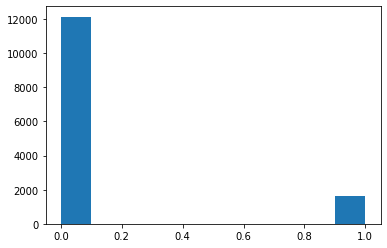

In [167]:
plt.hist(df["viaje_noche_fuera"])

##4 punto


##Se evidencia como el analisis de datos determino cada una de las variables necesarias para la ejecucion del modelo; sin embargo se concluye mediante diversas disyuntivas como cada una de las variable relevantes afectan directamente a la respuestas asiganada, si viaja o no viaja.



##integrantes:
-Juan Pino
-Alejandro Garzon
-Nikolas Venegas